In [ ]:
import tensorflow as tf
from tensorflow import keras

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.19.0


In [ ]:
# Carregar o dataset

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print()
print(train_images.shape)
print(len(train_labels))
print(train_labels)
print(test_images.shape)
print(len(test_labels))

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


In [ ]:
# Salva as classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

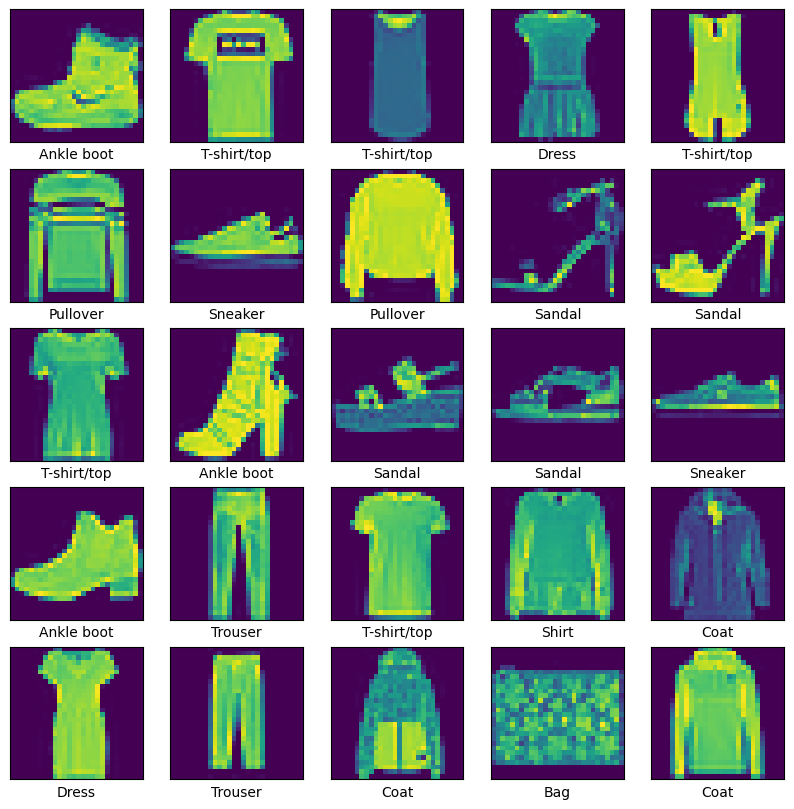

In [ ]:
# Exibir algumas imagens
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
# Normalizar os dados
# Toda imagem é representada por uma matriz de pixels que vai de 0 a 255
# Rede neurais funcionam melhor com valores de 0 a 1 ou -1 a 1.
# Então vamos dividir os valores da matriz por 255 para ter uma escala de 0 a 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# Torna a matriz bidimensional que repesenta as imagens em um vetor unidimensional
def flatten(f):
  flat_list = [item for sublist in f for item in sublist]
  return flat_list

# Criar as features para uso do sklearn
train_images_features = [ flatten(image) for image in train_images ]
test_images_features = [ flatten(image) for image in test_images ]

# Modelo utilizando Sklearn

In [ ]:
# Arquitetura da rede
ann = MLPClassifier(hidden_layer_sizes=(128,),
                    activation="relu",
                    solver="adam",
                    learning_rate_init=0.001,
                    max_iter=10,
                    random_state=42,
                    verbose=True)

# Treinamento do modelo
ann.fit(train_images_features, train_labels)

# Predição e avaliação
preds = ann.predict(test_images_features)
print("Acurácia: ", accuracy_score(test_labels, preds))

Iteration 1, loss = 0.58955020
Iteration 2, loss = 0.42246219
Iteration 3, loss = 0.38222630
Iteration 4, loss = 0.35730082
Iteration 5, loss = 0.33768557
Iteration 6, loss = 0.31672571
Iteration 7, loss = 0.30669854
Iteration 8, loss = 0.29504787
Iteration 9, loss = 0.28465529
Iteration 10, loss = 0.27497446


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia:  0.8811


# Modelo Utilizando TensorFlow

In [ ]:
# Definição da semente de aleatoriedade
tf.random.set_seed(42)

# Define o modelo
model = keras.Sequential( [
    keras.layers.Flatten(input_shape=(28, 28)), # camada de achatamento
    keras.layers.Dense(128, activation="relu"), # camada oculta densa com 128 neurônios, função de ativação relu
    keras.layers.Dense(10, activation="softmax") # camada de decisão densa com 10 neurônios
] )

# Compilar o modelo
model.compile(optimizer="adam", # algoritimo de otimização de busca de peso
              loss="sparse_categorical_crossentropy", # função de perda
              metrics=["accuracy"] # métrica otimizada durante o treinamento
              )

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# O que tem neste modelo? Exibir a arquitetura do modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Treinamento do modelo
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7831 - loss: 0.6258
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8601 - loss: 0.3905
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8742 - loss: 0.3448
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8826 - loss: 0.3171
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8903 - loss: 0.2969
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8958 - loss: 0.2811
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8996 - loss: 0.2673
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9047 - loss: 0.2545
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9081 - loss: 0.2449
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9125 - loss: 0.2350


In [ ]:
# Avaliação do modelo
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test loss: ", test_loss)
print("Test  ACC: ", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8730 - loss: 0.3750
Test loss:  0.37362274527549744
Test  ACC:  0.8734999895095825
